In [45]:
import numpy as np
import matplotlib.pyplot as plt
import src.terminal_set as terminal_set
from main import simulate
from src.mpc import Controller, Dimension

dt = 0.10  # Sampling period
T = 100

dim = Dimension(nx=12, nu=4, ny=3, nd=3)

x_init_out = np.zeros(dim.nx)  # Initial conditions
x_init_in = np.zeros(dim.nx)  # Initial conditions
y_target = np.zeros(dim.ny)  # State to reach
# x_init_out[0:3] = np.array([2.0, 2.0, 2.0])  # outside the Terminal set x.T@P@x = 18.85
# x_init_in[0:3] = np.array([0.01, 0.01, 0.1])  # inside the Terminal set x.T@P@x = 0.013
y_target[0:3] = np.array([1.0, 1.0, 1.0])

ctrl_mpc1 = Controller(
    dim=dim,
    mpc_horizon=10,
    timestep_mpc_stages=dt,
    control_type="mpc",
)
ctrl_mpc1.beta = 10.0

ctrl_mpc2 = Controller(
    dim=dim,
    mpc_horizon=15,
    timestep_mpc_stages=dt,
    control_type="mpc",
)
ctrl_mpc2.beta = 10.0

# ctrl.c_level = terminal_set.calculate_c(ctrl, x_target)

ctrl_lqr = Controller(
    dim=dim, mpc_horizon=10, timestep_mpc_stages=dt, control_type="lqr"
)

(states_lqr, actions_lqr, _, _, _, _, _, _) = simulate(
    controller=ctrl_lqr,
    x_init=x_init_out,
    y_target=y_target,
    T=T,
)

(states_mpc1, actions_mpc1, _, _, _, _, _, _) = simulate(
    controller=ctrl_mpc1,
    x_init=x_init_out,
    y_target=y_target,
    T=T,
)
(states_mpc2, actions_mpc2, _, _, _, _, _, _) = simulate(
    controller=ctrl_mpc2,
    x_init=x_init_out,
    y_target=y_target,
    T=T,
)

fN = plt.figure()

t = np.arange(0, 10.1, 0.1)



Simulating: 100%|██████████| 100/100 [00:02<00:00, 37.91it/s]


<Figure size 640x480 with 0 Axes>

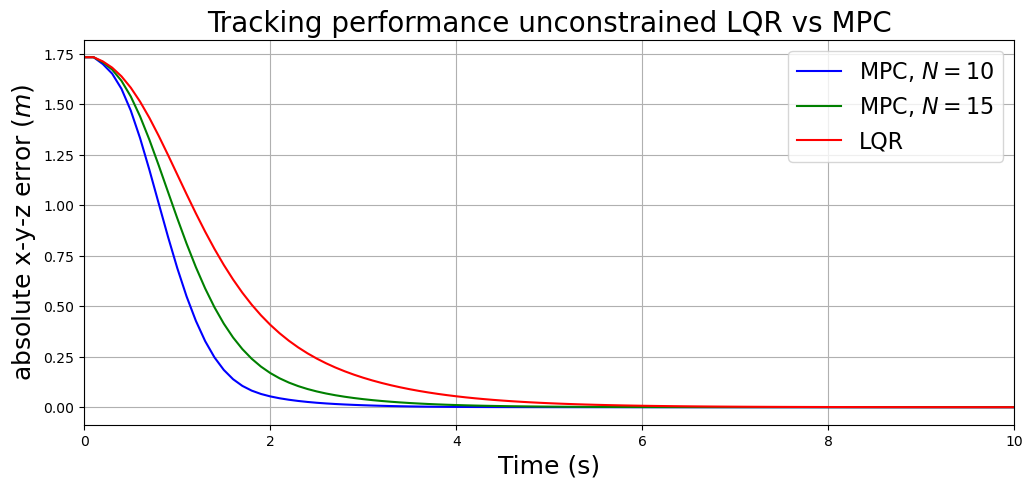

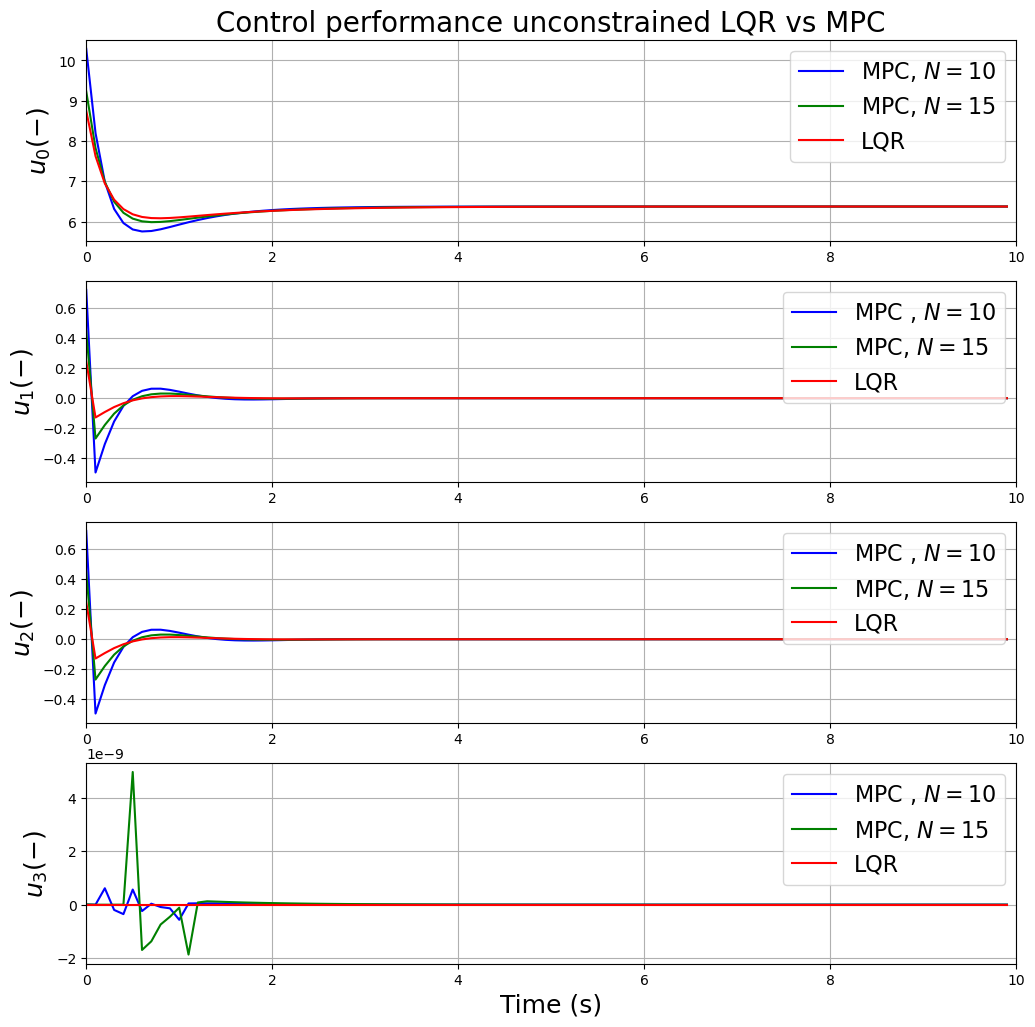

In [59]:

# As Cd is identity matrix, here we can use target output to represent target state
def error(states):
    # Euclidean error on x, y, z
    error = np.sqrt(
        np.square(y_target[0] - states[0, :])
        + np.square(y_target[1] - states[1, :])
        + np.square(y_target[2] - states[2, :])
    )
    return error

t = np.arange(0, 10.1, 0.1)

f1 = plt.figure(figsize=(12, 5))
ax1 = f1.add_subplot(1, 1, 1)
ax1.plot(t, error(states_mpc1), color="b", label=r"MPC" + r", $N = $" + str(ctrl_mpc1.N))
ax1.plot(t, error(states_mpc2), color="g", label=r"MPC" + r", $N = $" + str(ctrl_mpc2.N))
ax1.plot(t, error(states_lqr), color="r", label=r"LQR")

ax1.legend(fontsize=16, loc='upper right')
ax1.set_xlim([0, 10])
ax1.set_title(
    "Tracking performance unconstrained LQR vs MPC", fontsize=20
)
ax1.set_xlabel("Time (s)", fontsize=18)
ax1.set_ylabel(r"absolute x-y-z error $(m)$", fontsize=18)
ax1.grid()

fN = plt.figure(figsize=(12, 12))


ax2 = fN.add_subplot(4, 1, 1)
ax2.plot(np.arange(0, 10, 0.1), actions_mpc1[0, :], color="b", label=r"MPC" + r", $N = $" + str(ctrl_mpc1.N))
ax2.plot(np.arange(0, 10, 0.1), actions_mpc2[0, :], color="g", label=r"MPC" + r", $N = $" + str(ctrl_mpc2.N))
ax2.plot(np.arange(0, 10, 0.1), actions_lqr[0, :], color="r", label=r"LQR")

ax2.legend(fontsize=16, loc='upper right')
ax2.set_xlim([0, 10])
# ax2.set_xlabel("Time (s)", fontsize=18)
ax2.set_title(r"Control performance unconstrained LQR vs MPC", fontsize=20)
ax2.set_ylabel(r"$u_0 (-)$", fontsize=18)
ax2.grid()


ax3 = fN.add_subplot(4, 1, 2)
ax3.plot(np.arange(0, 10, 0.1), actions_mpc1[1, :], color="b", label=r"MPC " + r", $N = $" + str(ctrl_mpc1.N))
ax3.plot(np.arange(0, 10, 0.1), actions_mpc2[1, :], color="g", label=r"MPC" + r", $N = $" + str(ctrl_mpc2.N))
ax3.plot(np.arange(0, 10, 0.1), actions_lqr[1, :], color="r", label=r"LQR")

ax3.legend(fontsize=16, loc='upper right')
ax3.set_xlim([0, 10])
# ax3.set_xlabel("Time (s)", fontsize=18)
ax3.set_ylabel(r"$u_1 (-)$", fontsize=18)
ax3.grid()


ax4 = fN.add_subplot(4, 1, 3)
ax4.plot(np.arange(0, 10, 0.1), actions_mpc1[2, :], color="b", label=r"MPC " + r", $N = $" + str(ctrl_mpc1.N))
ax4.plot(np.arange(0, 10, 0.1), actions_mpc2[2, :], color="g", label=r"MPC" + r", $N = $" + str(ctrl_mpc2.N))
ax4.plot(np.arange(0, 10, 0.1), actions_lqr[2, :], color="r", label=r"LQR")

ax4.legend(fontsize=16, loc='upper right')
ax4.set_xlim([0, 10])
# ax4.set_xlabel("Time (s)", fontsize=18)
ax4.set_ylabel(r"$u_2 (-)$", fontsize=18)
ax4.grid()

ax5 = fN.add_subplot(4, 1, 4)
ax5.plot(np.arange(0, 10, 0.1), actions_mpc1[3, :], color="b", label=r"MPC " + r", $N = $" + str(ctrl_mpc1.N))
ax5.plot(np.arange(0, 10, 0.1), actions_mpc2[3, :], color="g", label=r"MPC" + r", $N = $" + str(ctrl_mpc2.N))
ax5.plot(np.arange(0, 10, 0.1), actions_lqr[3, :], color="r", label=r"LQR")

ax5.legend(fontsize=16, loc='upper right')
ax5.set_xlim([0, 10])
# ax5.set_xlabel("Time (s)", fontsize=18)
ax5.set_ylabel(r"$u_3 (-)$", fontsize=18)
ax5.grid()


ax5.set_xlabel("Time (s)", fontsize=18)
plt.show()